In [24]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\Integrated\\Documents\\Python\\blogs.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2000, 2)


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


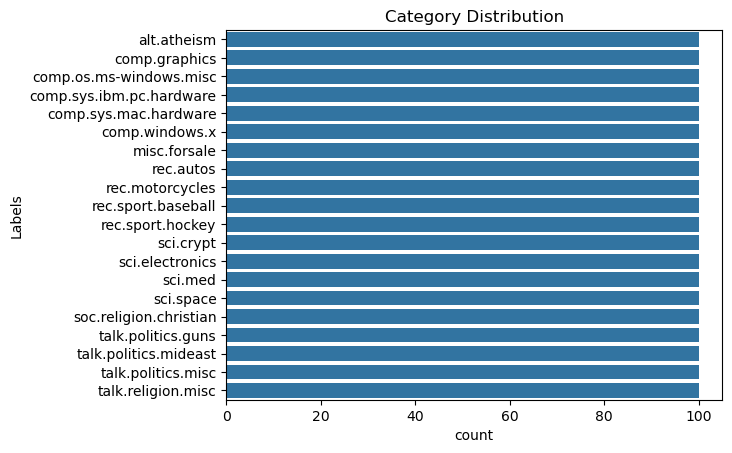

In [30]:
# Display category distribution
sns.countplot(y=df['Labels'])
plt.title('Category Distribution')
plt.show()

In [32]:
# Download stopwords and preprocess text
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[\n\r]+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Text'] = df['Data'].apply(preprocess_text)
df[['Data', 'Cleaned_Text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Integrated\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Data,Cleaned_Text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [36]:
#  Feature Extraction and Naive Bayes Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Labels']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

Accuracy: 0.8116666666666666
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.79      0.73      0.76        30
           comp.graphics       0.71      0.83      0.77        30
 comp.os.ms-windows.misc       0.74      0.83      0.78        30
comp.sys.ibm.pc.hardware       0.61      0.73      0.67        30
   comp.sys.mac.hardware       0.92      0.73      0.81        30
          comp.windows.x       0.81      0.73      0.77        30
            misc.forsale       0.90      0.90      0.90        30
               rec.autos       0.85      0.93      0.89        30
         rec.motorcycles       0.90      0.90      0.90        30
      rec.sport.baseball       0.91      1.00      0.95        30
        rec.sport.hockey       0.97      0.97      0.97        30
               sci.crypt       0.85      0.93      0.89        30
         sci.electronics       0.75      0.70      0.72        30
                 sci.m

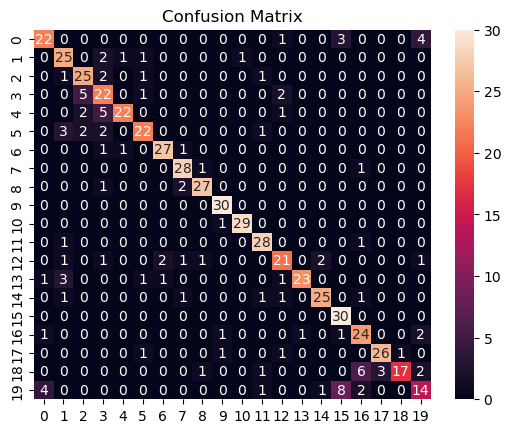

In [38]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

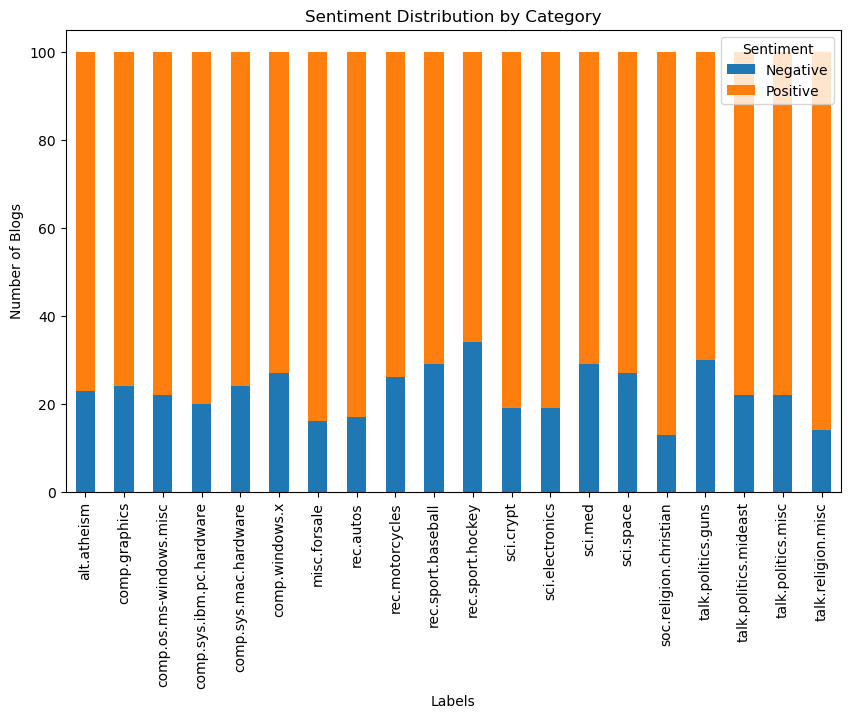

In [40]:
# Sentiment Analysis
from textblob import TextBlob

# Get sentiment polarity for each blog post
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment_Score'] = df['Data'].apply(get_sentiment)
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
df[['Labels', 'Sentiment']].groupby(['Labels', 'Sentiment']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Category')
plt.ylabel('Number of Blogs')
plt.show()

In [ ]:
4. Conclusion & Discussion (Simplified)
The Naive Bayes model gives a basic but effective way to classify blog posts by category.

Sentiment analysis helps understand the overall mood (positive, negative, neutral) in each category.

To improve results, we can try advanced models like deep learning in the future.